In [2]:
library(dplyr)


In [29]:
# install.packages("AER")


In [6]:
library(AER)

Warning message:
"package 'AER' was built under R version 3.6.3"Loading required package: car
Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival


In [11]:
df <- Affairs Load dataset Affairs

In [12]:
head(df)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
4,0,male,37,10.00,no,3,18,7,4
5,0,female,27,4.00,no,4,14,6,4
11,0,female,32,15.00,yes,1,12,1,4
16,0,male,57,15.00,yes,5,18,6,5
23,0,male,22,0.75,no,2,17,6,3
29,0,female,32,1.50,no,2,17,5,5


In [13]:
str(df) # Information about dataframe

'data.frame':	601 obs. of  9 variables:
 $ affairs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ gender       : Factor w/ 2 levels "female","male": 2 1 1 2 2 1 1 2 1 2 ...
 $ age          : num  37 27 32 57 22 32 22 57 32 22 ...
 $ yearsmarried : num  10 4 15 15 0.75 1.5 0.75 15 15 1.5 ...
 $ children     : Factor w/ 2 levels "no","yes": 1 1 2 2 1 1 1 2 2 1 ...
 $ religiousness: int  3 4 1 5 2 2 2 2 4 4 ...
 $ education    : num  18 14 12 18 17 17 12 14 16 14 ...
 $ occupation   : int  7 6 1 6 6 5 1 4 1 4 ...
 $ rating       : int  4 4 4 5 3 5 3 4 2 5 ...


## There are 601 observations and 9 variables.

In [20]:
sum(is.na(df)) # checking missing values

[1] 0

In [21]:
library(corrplot)

corrplot 0.90 loaded


In [24]:
cor_matrix = cor(df[,-c(2,5,10)]) # Correlation matrix of numerical variables

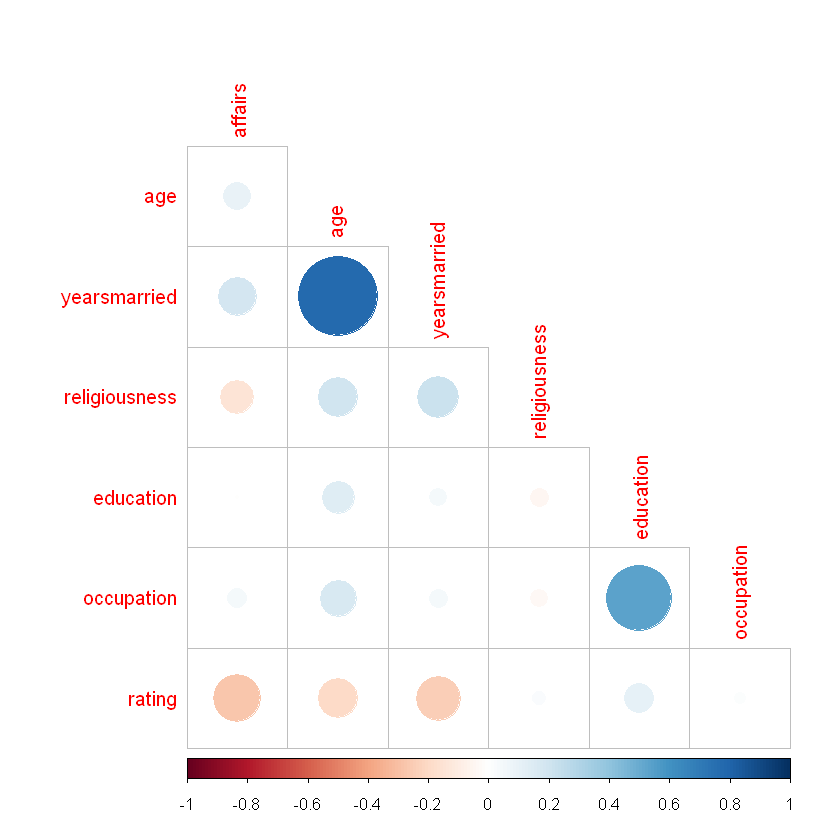

In [25]:
corrplot(cor_matrix, type = "lower",diag = F)# plot corr matrix

# Task 1: Using the affairs column of our data
Create a new column with nominal values “YES” and “NO”. Convert it into factor.

In [16]:
df$nominal_affairs <- "No"
df$nominal_affairs[df$affairs != 0] <- "Yes"
head(df)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,nominal_affairs
4,0,male,37,10.00,no,3,18,7,4,No
5,0,female,27,4.00,no,4,14,6,4,No
11,0,female,32,15.00,yes,1,12,1,4,No
16,0,male,57,15.00,yes,5,18,6,5,No
23,0,male,22,0.75,no,2,17,6,3,No
29,0,female,32,1.50,no,2,17,5,5,No


In [17]:
unique(df$nominal_affairs)

[1] "No"  "Yes"

In [18]:
df$nominal_affairs <- as.factor(df$nominal_affairs)
class(df$nominal_affairs)

[1] "factor"

# Task 2: Create a classifier with our data using Decision tree algorithm
## -> Plot the Decision tree. -> Calculate the accuracy using confusion matrix.

In [26]:
data <- df[,-1] # Remove affarirs column

In [28]:
# Install packages for decision tree model
# install.packages("rpart")
library(rpart)

In [30]:
# Build a training and testing set
set.seed(4)
id<-sample(2,nrow(data),prob = c(0.7,0.3),replace = T)
trainset<-data[id==1,]
testset<-data[id==2,]
head(trainset)

,gender,age,yearsmarried,children,religiousness,education,occupation,rating,nominal_affairs
4,male,37,10.0,no,3,18,7,4,No
5,female,27,4.0,no,4,14,6,4,No
11,female,32,15.0,yes,1,12,1,4,No
16,male,57,15.0,yes,5,18,6,5,No
29,female,32,1.5,no,2,17,5,5,No
49,male,22,1.5,no,4,14,4,5,No


## Decision Tree Model

In [31]:
#Build decision tree model
model<-rpart(trainset$nominal_affairs~. ,data = trainset)
summary(model)


Call:
rpart(formula = trainset$nominal_affairs ~ ., data = trainset)
  n= 419 

          CP nsplit rel error   xerror       xstd
1 0.04910714      0 1.0000000 1.000000 0.08088224
2 0.01339286      2 0.9017857 0.937500 0.07920169
3 0.01000000      4 0.8750000 1.044643 0.08199198

Variable importance
       rating           age     education  yearsmarried    occupation 
           50            26             9             5             4 
       gender      children religiousness 
            3             1             1 

Node number 1: 419 observations,    complexity param=0.04910714
  predicted class=No   expected loss=0.2673031  P(node) =1
    class counts:   307   112
   probabilities: 0.733 0.267 
  left son=2 (359 obs) right son=3 (60 obs)
  Primary splits:
      rating        < 2.5  to the right, improve=9.912034, (0 missing)
      yearsmarried  < 2.75 to the left,  improve=5.979199, (0 missing)
      children      splits as  LR,       improve=3.935208, (0 missing)
      age  

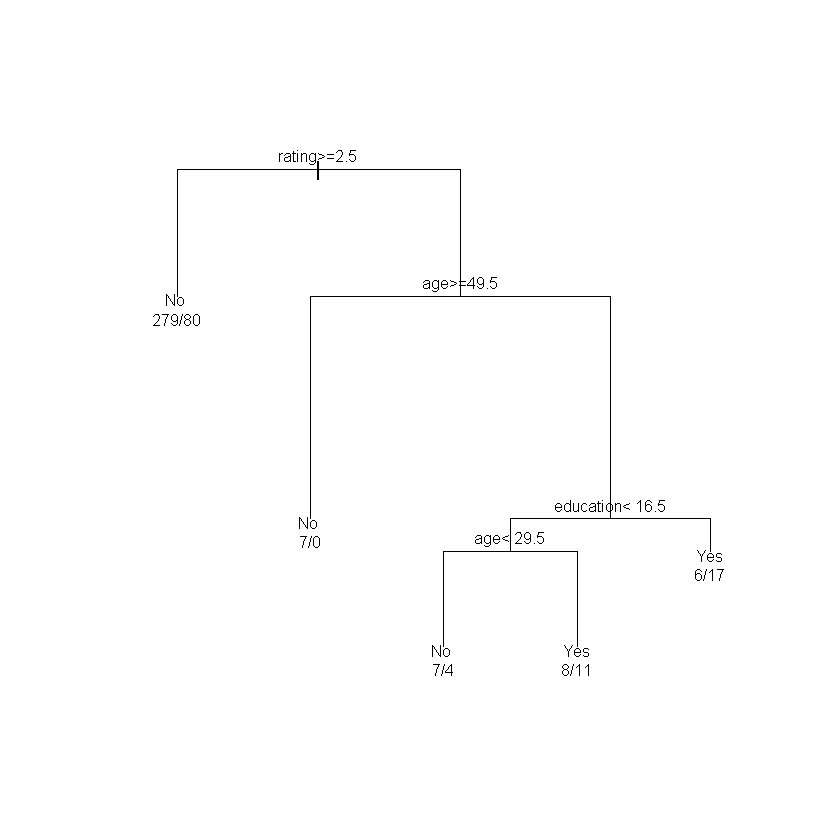

In [32]:
plot(model, margin=0.1)
text(model, use.n = TRUE,pretty = TRUE, cex=0.8)

In [33]:
# predict values
predvalues<-predict(model,newdata = testset,type = "class")
predvalues

23   44   45   47   50   80  108  115  116  123  127  139  151  165  172  210 
  No   No   No  Yes  Yes   No   No   No   No   No   No   No   No   No   No   No 
 227  239  241  245  265  267  269  271  293  295  321  324  362  366  382  412 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
 413  418  422  445  448  491  508  538  543  578  594  597  612  627  630  655 
  No   No   No  Yes   No   No   No   No   No   No   No   No   No   No   No   No 
 667  670  717  726  734  743  747  760  763  774  800  854  863  870  875  876 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
 880  903  908  909  915  916  950  961  966  967 1026 1030 1039 1046 1070 1087 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
1102 1103 1109 1130 1140 1143 1153 1177 1178 1180 1187 1207 1209 1211 1221 1229 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
1242 1285 1299 1305 1322 1324 1327 1328 1332 1333 1336 1344 1358 1364 1407 1413 
  No   No   No   No   No   No   No   No   No  Yes   No   No   No   No   No   No 
1433 1439 1469 1504 1585 1617 1638 1654 1665 1670 1675 1705 1711 1749 1754 1773 
  No   No   No   No   No   No   No   No   No   No   No  Yes  Yes   No   No   No 
1793 1799 1807 1818 1834 1846 1866 1873 1885 1892 1899 1905 1940 1947 1952 9012 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No  Yes 
   6   12   79  159  174  182  186  252  354  436  528  553  659  758  770  797 
  No   No   No   No  Yes   No   No   No   No   No   No   No   No   No   No  Yes 
 858  972  977  981 1007 1075 1138 1169 1294 1427 1550 1622 1669 1674 1685 1732 
  No   No   No   No  Yes  Yes   No   No   No   No   No   No  Yes   No   No  Yes 
1743 1751 1763 1831 1844 1935 
  No   No   No  Yes  Yes  Yes 
Levels: No Yes

In [34]:
#install.packages("caret")
library(caret)


Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'caret'

The following object is masked from 'package:survival':

    cluster



In [37]:
# install.packages("e1071")
library(e1071)

## Evaluation Matrix

In [38]:
confusionMatrix(table(predvalues, testset$nominal_affairs))
class(predvalues)
# Accuracy: 80.22%

Confusion Matrix and Statistics

          
predvalues  No Yes
       No  137  29
       Yes   7   9
                                          
               Accuracy : 0.8022          
                 95% CI : (0.7368, 0.8574)
    No Information Rate : 0.7912          
    P-Value [Acc > NIR] : 0.3986190       
                                          
                  Kappa : 0.2392          
                                          
 Mcnemar's Test P-Value : 0.0004653       
                                          
            Sensitivity : 0.9514          
            Specificity : 0.2368          
         Pos Pred Value : 0.8253          
         Neg Pred Value : 0.5625          
             Prevalence : 0.7912          
         Detection Rate : 0.7527          
   Detection Prevalence : 0.9121          
      Balanced Accuracy : 0.5941          
                                          
       'Positive' Class : No              
                                       

[1] "factor"

# Task 3: Create another classifier with our data using random forest algorithm
## -> Calculate the accuracy using confusion matrix. -> Find out the importance of attributes using importance() function.

In [39]:
#install.packages("randomForest")
library(randomForest)



randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [40]:
#Build random forest model
model1<-randomForest(trainset$nominal_affairs~. ,data = trainset, ntree =500)
model1



Call:
 randomForest(formula = trainset$nominal_affairs ~ ., data = trainset,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 26.01%
Confusion matrix:
     No Yes class.error
No  287  20  0.06514658
Yes  89  23  0.79464286

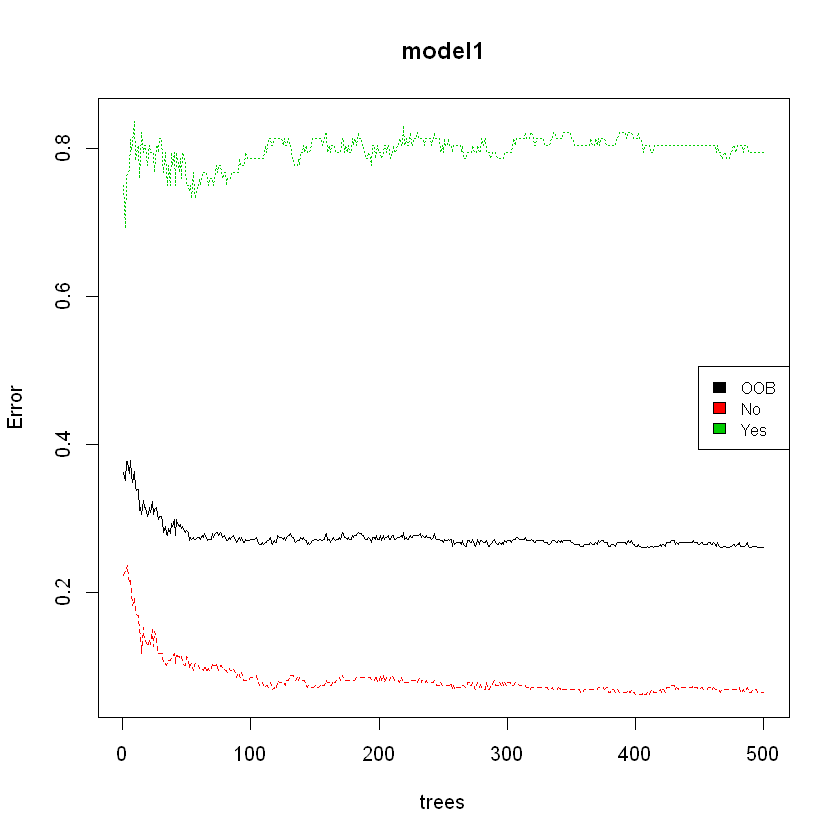

In [41]:
plot(model1)
legend("right", colnames(model1$err.rate),col=1:4,cex=0.8,fill=1:4)

In [42]:
predvalues<-predict(model1,newdata = testset,type = "class")
predvalues

23   44   45   47   50   80  108  115  116  123  127  139  151  165  172  210 
  No   No   No  Yes  Yes   No   No   No   No   No   No   No   No   No   No   No 
 227  239  241  245  265  267  269  271  293  295  321  324  362  366  382  412 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
 413  418  422  445  448  491  508  538  543  578  594  597  612  627  630  655 
  No   No   No  Yes   No   No   No   No   No   No   No   No   No   No   No   No 
 667  670  717  726  734  743  747  760  763  774  800  854  863  870  875  876 
 Yes   No  Yes   No   No   No   No   No   No   No   No   No   No   No   No   No 
 880  903  908  909  915  916  950  961  966  967 1026 1030 1039 1046 1070 1087 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
1102 1103 1109 1130 1140 1143 1153 1177 1178 1180 1187 1207 1209 1211 1221 1229 
  No  Yes   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
1242 1285 1299 1305 1322 1324 1327 1328 1332 1333 1336 1344 1358 1364 1407 1413 
  No   No   No   No   No   No   No   No   No   No   No  Yes   No   No   No   No 
1433 1439 1469 1504 1585 1617 1638 1654 1665 1670 1675 1705 1711 1749 1754 1773 
  No   No   No   No   No   No   No   No   No   No   No  Yes   No   No   No   No 
1793 1799 1807 1818 1834 1846 1866 1873 1885 1892 1899 1905 1940 1947 1952 9012 
 Yes   No  Yes   No   No   No   No   No   No   No   No   No   No   No   No  Yes 
   6   12   79  159  174  182  186  252  354  436  528  553  659  758  770  797 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No  Yes 
 858  972  977  981 1007 1075 1138 1169 1294 1427 1550 1622 1669 1674 1685 1732 
  No   No   No   No   No  Yes   No   No   No   No   No   No  Yes   No   No  Yes 
1743 1751 1763 1831 1844 1935 
  No   No   No  Yes  Yes  Yes 
Levels: No Yes

In [43]:
confusionMatrix(table(predvalues, testset$nominal_affairs))
# Accuracy : 78.57%

Confusion Matrix and Statistics

          
predvalues  No Yes
       No  133  31
       Yes  11   7
                                          
               Accuracy : 0.7692          
                 95% CI : (0.7011, 0.8283)
    No Information Rate : 0.7912          
    P-Value [Acc > NIR] : 0.79576         
                                          
                  Kappa : 0.1337          
                                          
 Mcnemar's Test P-Value : 0.00337         
                                          
            Sensitivity : 0.9236          
            Specificity : 0.1842          
         Pos Pred Value : 0.8110          
         Neg Pred Value : 0.3889          
             Prevalence : 0.7912          
         Detection Rate : 0.7308          
   Detection Prevalence : 0.9011          
      Balanced Accuracy : 0.5539          
                                          
       'Positive' Class : No              
                                       

,Overall
gender,5.916751
age,22.496638
yearsmarried,16.832938
children,4.229158
religiousness,18.839773
education,19.331233
occupation,17.255563
rating,23.260475


,MeanDecreaseGini
gender,5.916751
age,22.496638
yearsmarried,16.832938
children,4.229158
religiousness,18.839773
education,19.331233
occupation,17.255563
rating,23.260475


[1] 3215 7793 6301 1865 6946 7829 7039 6374

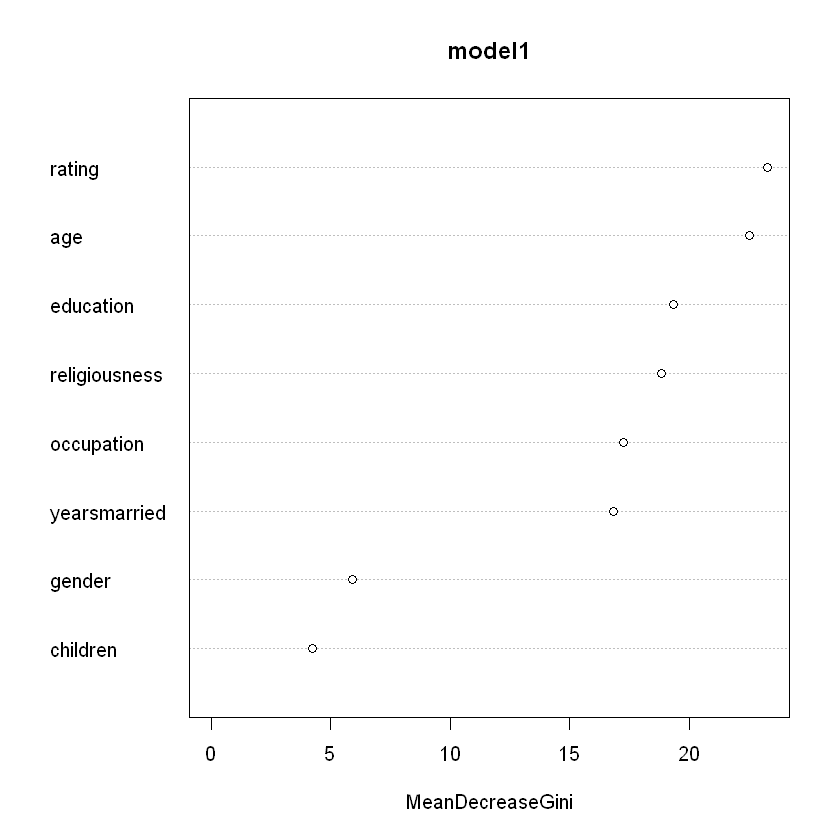

In [44]:
varImp(model1)
varImpPlot(model1,sort=TRUE, type=2)
importance(model1)
varUsed(model1)


# Feature "rating" is important among all.

# Thank you!